In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install twilio

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

In [6]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
path = "./traindata/"
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename =path+"%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


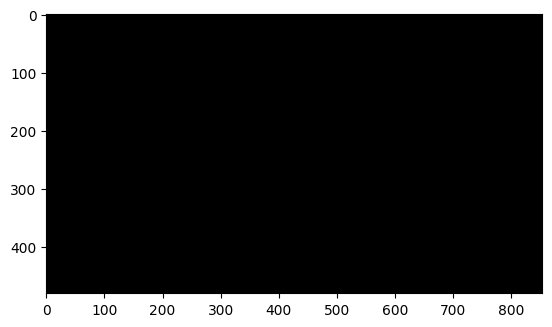

In [7]:
img = plt.imread('./traindata/0.jpg')   # reading image using its name
plt.imshow(img)

In [8]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [9]:
X = [ ]     # creating an empty array
tpath="traindata/"
for img_name in data.Image_ID:
    img = plt.imread(tpath + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [10]:
y = data.Class
dummy_y = np_utils.to_categorical(y)

In [11]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [12]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [14]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [16]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 4s 1s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [17]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [18]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [19]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
5/5 [==============================] - 2s 337ms/step - loss: 0.8745 - accuracy: 0.5032 - val_loss: 1.0042 - val_accuracy: 0.5522
Epoch 2/100
5/5 [==============================] - 1s 251ms/step - loss: 0.5033 - accuracy: 0.7419 - val_loss: 0.7901 - val_accuracy: 0.6866
Epoch 3/100
5/5 [==============================] - 1s 245ms/step - loss: 0.2932 - accuracy: 0.8645 - val_loss: 0.8394 - val_accuracy: 0.7463
Epoch 4/100
5/5 [==============================] - 1s 236ms/step - loss: 0.1656 - accuracy: 0.9290 - val_loss: 0.8557 - val_accuracy: 0.6866
Epoch 5/100
5/5 [==============================] - 1s 252ms/step - loss: 0.1333 - accuracy: 0.9613 - val_loss: 0.7819 - val_accuracy: 0.7612
Epoch 6/100
5/5 [==============================] - 1s 259ms/step - loss: 0.0686 - accuracy: 0.9935 - val_loss: 0.7926 - val_accuracy: 0.7910
Epoch 7/100
5/5 [==============================] - 1s 255ms/step - loss: 0.0659 - accuracy: 0.9935 - val_loss: 0.7656 - val_accuracy: 0.7612
Epoch 8/100
5

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
import joblib


joblib.dump(model, 'trained_model.pkl')
#saving model to local

['trained_model.pkl']

In [3]:
# Load the saved model
import joblib
model = joblib.load('trained_model.pkl')


In [24]:
count = 0
videoFile = "Accident-2.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    path="test/"
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename =path+"test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [25]:
test = pd.read_csv('test.csv')

In [26]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread(path + img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [27]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [28]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape

1/1 [==============================] - 0s 401ms/step


(6, 7, 7, 512)

In [30]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()

In [32]:
predictions = model.predict(test_image)

1/1 [==============================] - 0s 47ms/step


In [33]:
print(predictions)

[[0.02723292 0.97276706]
 [0.0166962  0.9833038 ]
 [0.00550224 0.9944977 ]
 [0.0142737  0.98572636]
 [0.07931869 0.9206813 ]
 [0.10126945 0.8987305 ]]


In [35]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

No Accident
No Accident
No Accident
No Accident
No Accident
No Accident


In [36]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = "ACc2a09b28a2a55c31129cb963048c4024"
auth_token = "72fa1731b0e3d58c8eab79830e178c49"
client = Client(account_sid, auth_token)

In [37]:
import cv2
cap = cv2.VideoCapture('Accident-2.mp4')
i=0
flag=0
snapshot_counter = 0
imgflag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            percent = predictions[int(i/15)%9][1]*100
            predict="No Accident" #+ str(percent)
        else:
            percent = predictions[int(i/15)%9][0]*100
            predict="Accident " + str(percent)
            flag=1

            if imgflag==0 and percent >80:
                AccSnapshotDir = 'AccSnaps/'      
                snapshot_filename = f'accident_snapshot_{snapshot_counter}.jpg'
                cv2.imwrite(AccSnapshotDir + snapshot_filename, frame)
                snapshot_counter += 1
                imgflag=1

        # Save a snapshot at the time of accident
            
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        # cv2.putText(frame,
        #         percent,
        #         (0, 255, 255),
        #         font, 1,
        #         (0, 255, 255),
        #         3,
        #         cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# if flag==1:
#     client.messages.create(
#                  body="Accident detected in "+locname.address,
#                  from_= "+12568040182",
#                  to= "+919074062399"
#                  )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


IndexError: index 6 is out of bounds for axis 0 with size 6

: 